In [138]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import tqdm
plt.style.use('ggplot')
%matplotlib inline

In [139]:
plt.rcParams['figure.figsize'] = (10, 6)

In [140]:
train_data = pd.read_csv('../data/clean-train.csv').dropna(axis=0)

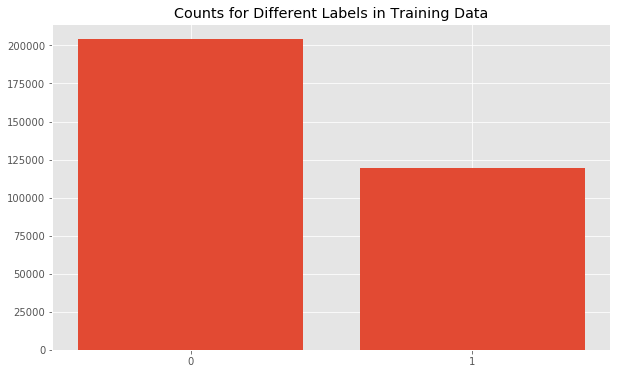

In [141]:
plt.figure()
plt.title('Counts for Different Labels in Training Data')
plt.bar([0, 1], [len(train_data[train_data['is_same'] == 0]), len(train_data[train_data['is_same'] == 1])])
plt.xticks([0, 1])
plt.savefig('../images/counts-labels.png')
plt.show()

In [142]:
def find_ngrams(input_list, n):
    return zip(*[input_list[i:] for i in range(n)])

def count_similar(q1, q2, n):
    n1 = find_ngrams(q1, n)
    n2 = find_ngrams(q2, n)
    return len(list(set(n1).intersection(n2)))

In [143]:
q1_list = train_data['q1'].str.split(' ')
q2_list = train_data['q2'].str.split(' ')

In [144]:
q1_pos = q1_list[train_data['is_same'] == 1]
q2_pos = q2_list[train_data['is_same'] == 1]

q1_neg = q1_list[train_data['is_same'] == 0]
q2_neg = q2_list[train_data['is_same'] == 0]

In [145]:
max_ngram = 4

In [146]:
counts_pos = np.empty((q1_pos.shape[0], max_ngram))
counts_neg = np.empty((q1_neg.shape[0], max_ngram))

In [147]:
counts = np.empty((q1_list.shape[0], max_ngram))

for i in tqdm.tnrange(q1_list.shape[0]):
    for j in range(max_ngram):
        counts[i, j] = count_similar(q1_list.iloc[i], q2_list.iloc[i], j+1)

HBox(children=(IntProgress(value=0, max=323408), HTML(value='')))

In [148]:
for i in tqdm.tnrange(q1_pos.shape[0]):
    for j in range(max_ngram):
        counts_pos[i, j] = count_similar(q1_pos.iloc[i], q2_pos.iloc[i], j+1)

HBox(children=(IntProgress(value=0, max=119312), HTML(value='')))

In [149]:
for i in tqdm.tnrange(q1_neg.shape[0]):
    for j in range(max_ngram):
        counts_neg[i, j] = count_similar(q1_neg.iloc[i], q2_neg.iloc[i], j+1)

HBox(children=(IntProgress(value=0, max=204096), HTML(value='')))

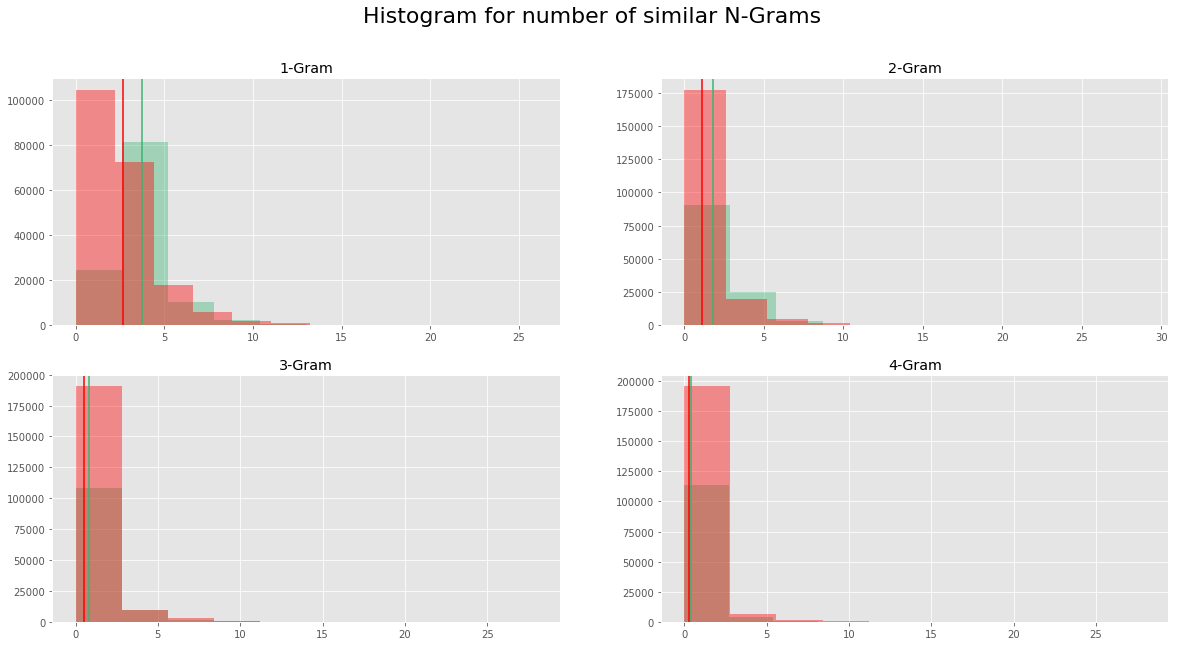

In [150]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
plt.suptitle('Histogram for number of similar N-Grams', fontsize=22)
N = 0

for i in range(2):
    for j in range(2):
        ax[i, j].hist(counts_pos[:, N], color='mediumseagreen', alpha=0.4)
        ax[i, j].hist(counts_neg[:, N], color='red', alpha=0.4)
        ax[i, j].axvline(np.mean(counts_pos[:, N]), label='Number of Similar n-grams mean for positive',
                         c='mediumseagreen')
        ax[i, j].axvline(np.mean(counts_neg[:, N]), label='Number of Similar n-grams mean for negative',
                 c='red')
        ax[i, j].set_title(str(N+1)+'-Gram')
        N += 1
fig.savefig('../images/hist-sim-grams.png')

In [151]:
counts_df = pd.DataFrame(counts, columns=['1-grams', '2-grams', '3-grams', '4-grams'])
counts_df['is_same'] = train_data['is_same']

/Users/maded/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  import sys


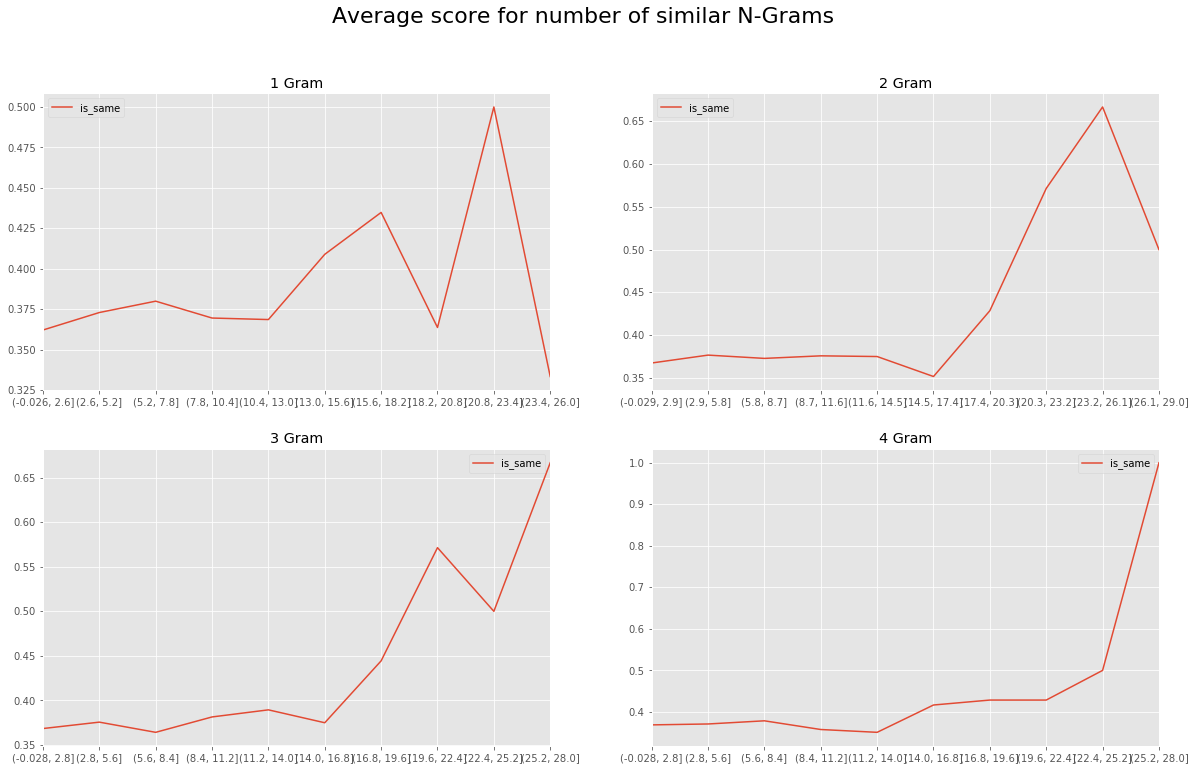

In [152]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
plt.suptitle('Average score for number of similar N-Grams', fontsize=22)
N = 0

for i in range(2):
    for j in range(2):
        pd.groupby(counts_df, pd.cut(counts_df[str(N+1) + '-grams'], 10))[['is_same']].mean().plot(ax=ax[i, j],
                                                                                        title=str(N+1)+ ' Gram')
        ax[i, j].axes.get_xaxis().set_label_text('')
        N += 1
fig.savefig('../images/average-sim-grams.png')